# Ch 04

# Embedding 계층

In [1]:
import numpy as np
W = np.arange(21).reshape(7, 3)
print(W)

print("-"*50)
print(W[2])
print("-"*50)

print(W[5])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]]
--------------------------------------------------
[6 7 8]
--------------------------------------------------
[15 16 17]


In [2]:
idx = np.array([1, 0, 3, 0])
W[idx]

array([[ 3,  4,  5],
       [ 0,  1,  2],
       [ 9, 10, 11],
       [ 0,  1,  2]])

# -> 파이썬으로 쉽게 구현이 가능!

In [3]:
class Embedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros,_like(W)]
        self.idx = None
        
    def forward(self, idx):
        W, =self.params
        self.idx = idx
        out = W[idx]
        return out

In [4]:
def backward(self, dout):
    dW = self.grads
    dW[...] = 0
     
    for i, word_to_id  in enumerate(self.idx):
        dW[word_to_id] += dout[i] # for문보다는 np.add.at()을 사용해서 효율을 높이자! 
        
        return None

In [5]:
class Embeddingot:
    def __init__(self, W):
        self.embed = Embedding(W)
        self.params = self.embed.params
        self.grads = self.embed.grads
        self.cache = None
        
    def forward(self, h, idx):
        target_W = self.embed.forward(idx)
        out = np.sum(target_W*h, axis=1)
        
        self.cache = (h, target_W)
        return out
    
    def backward(self, dout):
        h, target_W = self.cache
        dout = dout.reshape(dout.shape[0],1)
        
        dtarget_W = dout *h
        self.embed.backward(dtarget_W)
        return dh

In [6]:
import numpy as np

np.random.choice(10)

7

In [7]:
words = ["you", "say","goodbye", "i", "hello","."]
np.random.choice(words)

'hello'

In [8]:
np.random.choice(words, size= 5) # 복원추출

array(['goodbye', 'say', 'say', 'hello', 'hello'], dtype='<U7')

In [9]:
np.random.choice(words, size= 5, replace=False) # 비복원추출

array(['say', 'i', 'hello', '.', 'goodbye'], dtype='<U7')

In [10]:
p = [0.5, 0.1, 0.05, 0.2, 0.05, 0.1]
np.random.choice(words, p=p)

'you'

In [11]:
p = [0.7, 0.29, 0.01]
new_p = np.power(p, 0.75)
new_p /= np.sum(new_p)
print(new_p)  # 원래의 확률을 높이는 역할

[0.64196878 0.33150408 0.02652714]


In [12]:
from negative_sampling_layer import UnigramSampler

In [13]:
corpus = np.array([0, 1, 2, 3, 4, 1, 2, 3])
power= 0.75
sample_size = 2

sampler = UnigramSampler(corpus, power, sample_size)
target = np.array([1, 3, 0])
negative_sample = sampler.get_negative_sample(target)
print(negative_sample)

[[0 3]
 [4 1]
 [4 1]]


In [14]:
class NegativeSamplingLoss:
    def __init__(self, W, corpus, power=0.75, sample_size=5):
        sefl.sample_size = sample_size
        self.sampler = UnigramSampler(corpus, power, sample_size)
        self.loss_layers = [SigmoidWithLoss() for _ in range(sample_size+1)]
        self.embed_dot_layers = [EmbeddingDot(W) for _ in range(sample_szie+1)]
        self.params , self.grads = [], []
        for layer in self.embed_doy_layers :
            self.params +=  layer.params
            self.grads += layer.grads
                                 

In [15]:
def forward(self, h, target):
    batch_size = target.shape[0]
    negative_sample = self.sampler.get_negative_sampler(target)
    
    score = self.embed_dot_layers[0].forward(h, target)
    correct_label = np.ones(batch_size, dtype=np.int32)
    loss = self.loss_layers[0].forward(score, correct_label)
    
    negative_label = np.zeros(batch_size, dtype = np.int32)
    for i in range( self.sample_size):
        negative_target = negative_sample[:, i]
        score = self.embed_dot_layers[1+ i].forward(h, negative_target)
        loss += self.loss_layers[1+ i].forward(score, negative_label)
        
        return loss

In [16]:
def backward(self, dout =1):
    dh = 0
    for l0, l1 in zip(self.loss_layer, self.embed_dot_layers):
        dscore = l0.backward(dout)
        df += l1.backward(dscore)
        
        return dh

| 에폭 1 |  반복 1 / 9295 | 시간 0[s] | 손실 4.16
| 에폭 1 |  반복 21 / 9295 | 시간 3[s] | 손실 4.16
| 에폭 1 |  반복 41 / 9295 | 시간 7[s] | 손실 4.15
| 에폭 1 |  반복 61 / 9295 | 시간 10[s] | 손실 4.12
| 에폭 1 |  반복 81 / 9295 | 시간 13[s] | 손실 4.05
| 에폭 1 |  반복 101 / 9295 | 시간 17[s] | 손실 3.93
| 에폭 1 |  반복 121 / 9295 | 시간 20[s] | 손실 3.78
| 에폭 1 |  반복 141 / 9295 | 시간 23[s] | 손실 3.63
| 에폭 1 |  반복 161 / 9295 | 시간 27[s] | 손실 3.49
| 에폭 1 |  반복 181 / 9295 | 시간 30[s] | 손실 3.35
| 에폭 1 |  반복 201 / 9295 | 시간 33[s] | 손실 3.25
| 에폭 1 |  반복 221 / 9295 | 시간 37[s] | 손실 3.18
| 에폭 1 |  반복 241 / 9295 | 시간 40[s] | 손실 3.08
| 에폭 1 |  반복 261 / 9295 | 시간 43[s] | 손실 3.03
| 에폭 1 |  반복 281 / 9295 | 시간 47[s] | 손실 2.97
| 에폭 1 |  반복 301 / 9295 | 시간 50[s] | 손실 2.91
| 에폭 1 |  반복 321 / 9295 | 시간 53[s] | 손실 2.86
| 에폭 1 |  반복 341 / 9295 | 시간 56[s] | 손실 2.83
| 에폭 1 |  반복 361 / 9295 | 시간 60[s] | 손실 2.82
| 에폭 1 |  반복 381 / 9295 | 시간 63[s] | 손실 2.79
| 에폭 1 |  반복 401 / 9295 | 시간 66[s] | 손실 2.76
| 에폭 1 |  반복 421 / 9295 | 시간 70[s] | 손실 2.73
| 에폭 1 |  반복 441 / 

| 에폭 1 |  반복 3541 / 9295 | 시간 573[s] | 손실 2.41
| 에폭 1 |  반복 3561 / 9295 | 시간 577[s] | 손실 2.43
| 에폭 1 |  반복 3581 / 9295 | 시간 580[s] | 손실 2.43
| 에폭 1 |  반복 3601 / 9295 | 시간 583[s] | 손실 2.44
| 에폭 1 |  반복 3621 / 9295 | 시간 586[s] | 손실 2.40
| 에폭 1 |  반복 3641 / 9295 | 시간 589[s] | 손실 2.43
| 에폭 1 |  반복 3661 / 9295 | 시간 592[s] | 손실 2.41
| 에폭 1 |  반복 3681 / 9295 | 시간 595[s] | 손실 2.40
| 에폭 1 |  반복 3701 / 9295 | 시간 598[s] | 손실 2.38
| 에폭 1 |  반복 3721 / 9295 | 시간 602[s] | 손실 2.42
| 에폭 1 |  반복 3741 / 9295 | 시간 605[s] | 손실 2.40
| 에폭 1 |  반복 3761 / 9295 | 시간 608[s] | 손실 2.45
| 에폭 1 |  반복 3781 / 9295 | 시간 611[s] | 손실 2.41
| 에폭 1 |  반복 3801 / 9295 | 시간 614[s] | 손실 2.42
| 에폭 1 |  반복 3821 / 9295 | 시간 617[s] | 손실 2.41
| 에폭 1 |  반복 3841 / 9295 | 시간 620[s] | 손실 2.41
| 에폭 1 |  반복 3861 / 9295 | 시간 623[s] | 손실 2.39
| 에폭 1 |  반복 3881 / 9295 | 시간 626[s] | 손실 2.39
| 에폭 1 |  반복 3901 / 9295 | 시간 630[s] | 손실 2.41
| 에폭 1 |  반복 3921 / 9295 | 시간 633[s] | 손실 2.38
| 에폭 1 |  반복 3941 / 9295 | 시간 636[s] | 손실 2.44
| 에폭 1 |  반복 

| 에폭 1 |  반복 7021 / 9295 | 시간 1131[s] | 손실 2.30
| 에폭 1 |  반복 7041 / 9295 | 시간 1134[s] | 손실 2.26
| 에폭 1 |  반복 7061 / 9295 | 시간 1137[s] | 손실 2.27
| 에폭 1 |  반복 7081 / 9295 | 시간 1141[s] | 손실 2.28
| 에폭 1 |  반복 7101 / 9295 | 시간 1144[s] | 손실 2.29
| 에폭 1 |  반복 7121 / 9295 | 시간 1147[s] | 손실 2.32
| 에폭 1 |  반복 7141 / 9295 | 시간 1150[s] | 손실 2.31
| 에폭 1 |  반복 7161 / 9295 | 시간 1153[s] | 손실 2.30
| 에폭 1 |  반복 7181 / 9295 | 시간 1156[s] | 손실 2.28
| 에폭 1 |  반복 7201 / 9295 | 시간 1159[s] | 손실 2.30
| 에폭 1 |  반복 7221 / 9295 | 시간 1162[s] | 손실 2.30
| 에폭 1 |  반복 7241 / 9295 | 시간 1166[s] | 손실 2.26
| 에폭 1 |  반복 7261 / 9295 | 시간 1169[s] | 손실 2.31
| 에폭 1 |  반복 7281 / 9295 | 시간 1172[s] | 손실 2.29
| 에폭 1 |  반복 7301 / 9295 | 시간 1175[s] | 손실 2.30
| 에폭 1 |  반복 7321 / 9295 | 시간 1178[s] | 손실 2.25
| 에폭 1 |  반복 7341 / 9295 | 시간 1182[s] | 손실 2.25
| 에폭 1 |  반복 7361 / 9295 | 시간 1185[s] | 손실 2.27
| 에폭 1 |  반복 7381 / 9295 | 시간 1188[s] | 손실 2.29
| 에폭 1 |  반복 7401 / 9295 | 시간 1191[s] | 손실 2.24
| 에폭 1 |  반복 7421 / 9295 | 시간 1195[s] | 

| 에폭 2 |  반복 1161 / 9295 | 시간 1688[s] | 손실 2.14
| 에폭 2 |  반복 1181 / 9295 | 시간 1691[s] | 손실 2.18
| 에폭 2 |  반복 1201 / 9295 | 시간 1695[s] | 손실 2.15
| 에폭 2 |  반복 1221 / 9295 | 시간 1698[s] | 손실 2.16
| 에폭 2 |  반복 1241 / 9295 | 시간 1701[s] | 손실 2.17
| 에폭 2 |  반복 1261 / 9295 | 시간 1704[s] | 손실 2.17
| 에폭 2 |  반복 1281 / 9295 | 시간 1707[s] | 손실 2.15
| 에폭 2 |  반복 1301 / 9295 | 시간 1710[s] | 손실 2.16
| 에폭 2 |  반복 1321 / 9295 | 시간 1713[s] | 손실 2.12
| 에폭 2 |  반복 1341 / 9295 | 시간 1716[s] | 손실 2.10
| 에폭 2 |  반복 1361 / 9295 | 시간 1719[s] | 손실 2.14
| 에폭 2 |  반복 1381 / 9295 | 시간 1722[s] | 손실 2.13
| 에폭 2 |  반복 1401 / 9295 | 시간 1725[s] | 손실 2.15
| 에폭 2 |  반복 1421 / 9295 | 시간 1728[s] | 손실 2.16
| 에폭 2 |  반복 1441 / 9295 | 시간 1731[s] | 손실 2.16
| 에폭 2 |  반복 1461 / 9295 | 시간 1734[s] | 손실 2.12
| 에폭 2 |  반복 1481 / 9295 | 시간 1737[s] | 손실 2.17
| 에폭 2 |  반복 1501 / 9295 | 시간 1740[s] | 손실 2.15
| 에폭 2 |  반복 1521 / 9295 | 시간 1743[s] | 손실 2.14
| 에폭 2 |  반복 1541 / 9295 | 시간 1746[s] | 손실 2.17
| 에폭 2 |  반복 1561 / 9295 | 시간 1749[s] | 

| 에폭 2 |  반복 4581 / 9295 | 시간 2178[s] | 손실 2.09
| 에폭 2 |  반복 4601 / 9295 | 시간 2180[s] | 손실 2.08
| 에폭 2 |  반복 4621 / 9295 | 시간 2183[s] | 손실 2.08
| 에폭 2 |  반복 4641 / 9295 | 시간 2185[s] | 손실 2.04
| 에폭 2 |  반복 4661 / 9295 | 시간 2187[s] | 손실 2.09
| 에폭 2 |  반복 4681 / 9295 | 시간 2190[s] | 손실 2.08
| 에폭 2 |  반복 4701 / 9295 | 시간 2192[s] | 손실 2.08
| 에폭 2 |  반복 4721 / 9295 | 시간 2194[s] | 손실 2.13
| 에폭 2 |  반복 4741 / 9295 | 시간 2196[s] | 손실 2.12
| 에폭 2 |  반복 4761 / 9295 | 시간 2198[s] | 손실 2.08
| 에폭 2 |  반복 4781 / 9295 | 시간 2201[s] | 손실 2.10
| 에폭 2 |  반복 4801 / 9295 | 시간 2203[s] | 손실 2.06
| 에폭 2 |  반복 4821 / 9295 | 시간 2205[s] | 손실 2.07
| 에폭 2 |  반복 4841 / 9295 | 시간 2208[s] | 손실 2.11
| 에폭 2 |  반복 4861 / 9295 | 시간 2210[s] | 손실 2.06
| 에폭 2 |  반복 4881 / 9295 | 시간 2212[s] | 손실 2.12
| 에폭 2 |  반복 4901 / 9295 | 시간 2215[s] | 손실 2.08
| 에폭 2 |  반복 4921 / 9295 | 시간 2217[s] | 손실 2.09
| 에폭 2 |  반복 4941 / 9295 | 시간 2219[s] | 손실 2.07
| 에폭 2 |  반복 4961 / 9295 | 시간 2221[s] | 손실 2.08
| 에폭 2 |  반복 4981 / 9295 | 시간 2223[s] | 

| 에폭 2 |  반복 8001 / 9295 | 시간 2549[s] | 손실 2.00
| 에폭 2 |  반복 8021 / 9295 | 시간 2552[s] | 손실 2.04
| 에폭 2 |  반복 8041 / 9295 | 시간 2554[s] | 손실 2.03
| 에폭 2 |  반복 8061 / 9295 | 시간 2557[s] | 손실 2.03
| 에폭 2 |  반복 8081 / 9295 | 시간 2559[s] | 손실 2.02
| 에폭 2 |  반복 8101 / 9295 | 시간 2561[s] | 손실 2.04
| 에폭 2 |  반복 8121 / 9295 | 시간 2563[s] | 손실 2.01
| 에폭 2 |  반복 8141 / 9295 | 시간 2566[s] | 손실 2.04
| 에폭 2 |  반복 8161 / 9295 | 시간 2568[s] | 손실 2.06
| 에폭 2 |  반복 8181 / 9295 | 시간 2570[s] | 손실 2.01
| 에폭 2 |  반복 8201 / 9295 | 시간 2572[s] | 손실 2.05
| 에폭 2 |  반복 8221 / 9295 | 시간 2574[s] | 손실 2.03
| 에폭 2 |  반복 8241 / 9295 | 시간 2576[s] | 손실 2.02
| 에폭 2 |  반복 8261 / 9295 | 시간 2578[s] | 손실 2.07
| 에폭 2 |  반복 8281 / 9295 | 시간 2580[s] | 손실 2.04
| 에폭 2 |  반복 8301 / 9295 | 시간 2582[s] | 손실 2.05
| 에폭 2 |  반복 8321 / 9295 | 시간 2583[s] | 손실 2.00
| 에폭 2 |  반복 8341 / 9295 | 시간 2585[s] | 손실 2.05
| 에폭 2 |  반복 8361 / 9295 | 시간 2587[s] | 손실 2.02
| 에폭 2 |  반복 8381 / 9295 | 시간 2589[s] | 손실 2.00
| 에폭 2 |  반복 8401 / 9295 | 시간 2591[s] | 

| 에폭 3 |  반복 2141 / 9295 | 시간 2927[s] | 손실 1.97
| 에폭 3 |  반복 2161 / 9295 | 시간 2929[s] | 손실 1.95
| 에폭 3 |  반복 2181 / 9295 | 시간 2931[s] | 손실 1.96
| 에폭 3 |  반복 2201 / 9295 | 시간 2933[s] | 손실 1.99
| 에폭 3 |  반복 2221 / 9295 | 시간 2936[s] | 손실 1.97
| 에폭 3 |  반복 2241 / 9295 | 시간 2938[s] | 손실 1.93
| 에폭 3 |  반복 2261 / 9295 | 시간 2940[s] | 손실 1.91
| 에폭 3 |  반복 2281 / 9295 | 시간 2942[s] | 손실 1.94
| 에폭 3 |  반복 2301 / 9295 | 시간 2944[s] | 손실 1.95
| 에폭 3 |  반복 2321 / 9295 | 시간 2946[s] | 손실 1.93
| 에폭 3 |  반복 2341 / 9295 | 시간 2948[s] | 손실 1.94
| 에폭 3 |  반복 2361 / 9295 | 시간 2951[s] | 손실 1.92
| 에폭 3 |  반복 2381 / 9295 | 시간 2953[s] | 손실 1.92
| 에폭 3 |  반복 2401 / 9295 | 시간 2955[s] | 손실 1.90
| 에폭 3 |  반복 2421 / 9295 | 시간 2957[s] | 손실 1.94
| 에폭 3 |  반복 2441 / 9295 | 시간 2960[s] | 손실 1.94
| 에폭 3 |  반복 2461 / 9295 | 시간 2962[s] | 손실 1.96
| 에폭 3 |  반복 2481 / 9295 | 시간 2965[s] | 손실 1.96
| 에폭 3 |  반복 2501 / 9295 | 시간 2967[s] | 손실 1.93
| 에폭 3 |  반복 2521 / 9295 | 시간 2970[s] | 손실 1.95
| 에폭 3 |  반복 2541 / 9295 | 시간 2972[s] | 

| 에폭 3 |  반복 5561 / 9295 | 시간 3313[s] | 손실 1.95
| 에폭 3 |  반복 5581 / 9295 | 시간 3315[s] | 손실 1.88
| 에폭 3 |  반복 5601 / 9295 | 시간 3318[s] | 손실 1.94
| 에폭 3 |  반복 5621 / 9295 | 시간 3321[s] | 손실 1.88
| 에폭 3 |  반복 5641 / 9295 | 시간 3323[s] | 손실 1.96
| 에폭 3 |  반복 5661 / 9295 | 시간 3326[s] | 손실 1.93
| 에폭 3 |  반복 5681 / 9295 | 시간 3329[s] | 손실 1.90
| 에폭 3 |  반복 5701 / 9295 | 시간 3332[s] | 손실 1.94
| 에폭 3 |  반복 5721 / 9295 | 시간 3334[s] | 손실 1.92
| 에폭 3 |  반복 5741 / 9295 | 시간 3337[s] | 손실 1.91
| 에폭 3 |  반복 5761 / 9295 | 시간 3339[s] | 손실 1.89
| 에폭 3 |  반복 5781 / 9295 | 시간 3342[s] | 손실 1.89
| 에폭 3 |  반복 5801 / 9295 | 시간 3344[s] | 손실 1.92
| 에폭 3 |  반복 5821 / 9295 | 시간 3347[s] | 손실 1.91
| 에폭 3 |  반복 5841 / 9295 | 시간 3349[s] | 손실 1.94
| 에폭 3 |  반복 5861 / 9295 | 시간 3351[s] | 손실 1.93
| 에폭 3 |  반복 5881 / 9295 | 시간 3353[s] | 손실 1.90
| 에폭 3 |  반복 5901 / 9295 | 시간 3355[s] | 손실 1.92
| 에폭 3 |  반복 5921 / 9295 | 시간 3357[s] | 손실 1.92
| 에폭 3 |  반복 5941 / 9295 | 시간 3359[s] | 손실 1.92
| 에폭 3 |  반복 5961 / 9295 | 시간 3361[s] | 

| 에폭 3 |  반복 8981 / 9295 | 시간 3705[s] | 손실 1.88
| 에폭 3 |  반복 9001 / 9295 | 시간 3707[s] | 손실 1.87
| 에폭 3 |  반복 9021 / 9295 | 시간 3709[s] | 손실 1.89
| 에폭 3 |  반복 9041 / 9295 | 시간 3712[s] | 손실 1.88
| 에폭 3 |  반복 9061 / 9295 | 시간 3714[s] | 손실 1.87
| 에폭 3 |  반복 9081 / 9295 | 시간 3716[s] | 손실 1.91
| 에폭 3 |  반복 9101 / 9295 | 시간 3718[s] | 손실 1.91
| 에폭 3 |  반복 9121 / 9295 | 시간 3721[s] | 손실 1.87
| 에폭 3 |  반복 9141 / 9295 | 시간 3723[s] | 손실 1.87
| 에폭 3 |  반복 9161 / 9295 | 시간 3726[s] | 손실 1.91
| 에폭 3 |  반복 9181 / 9295 | 시간 3728[s] | 손실 1.88
| 에폭 3 |  반복 9201 / 9295 | 시간 3731[s] | 손실 1.91
| 에폭 3 |  반복 9221 / 9295 | 시간 3737[s] | 손실 1.89
| 에폭 3 |  반복 9241 / 9295 | 시간 3740[s] | 손실 1.87
| 에폭 3 |  반복 9261 / 9295 | 시간 3742[s] | 손실 1.87
| 에폭 3 |  반복 9281 / 9295 | 시간 3745[s] | 손실 1.90
| 에폭 4 |  반복 1 / 9295 | 시간 3747[s] | 손실 1.90
| 에폭 4 |  반복 21 / 9295 | 시간 3749[s] | 손실 1.79
| 에폭 4 |  반복 41 / 9295 | 시간 4515[s] | 손실 1.83
| 에폭 4 |  반복 61 / 9295 | 시간 4518[s] | 손실 1.84
| 에폭 4 |  반복 81 / 9295 | 시간 4521[s] | 손실 1.82
| 에

| 에폭 4 |  반복 3121 / 9295 | 시간 4809[s] | 손실 1.83
| 에폭 4 |  반복 3141 / 9295 | 시간 4811[s] | 손실 1.82
| 에폭 4 |  반복 3161 / 9295 | 시간 4813[s] | 손실 1.82
| 에폭 4 |  반복 3181 / 9295 | 시간 4815[s] | 손실 1.80
| 에폭 4 |  반복 3201 / 9295 | 시간 4817[s] | 손실 1.80
| 에폭 4 |  반복 3221 / 9295 | 시간 4819[s] | 손실 1.80
| 에폭 4 |  반복 3241 / 9295 | 시간 4821[s] | 손실 1.79
| 에폭 4 |  반복 3261 / 9295 | 시간 4823[s] | 손실 1.83
| 에폭 4 |  반복 3281 / 9295 | 시간 4825[s] | 손실 1.81
| 에폭 4 |  반복 3301 / 9295 | 시간 4827[s] | 손실 1.78
| 에폭 4 |  반복 3321 / 9295 | 시간 4829[s] | 손실 1.79
| 에폭 4 |  반복 3341 / 9295 | 시간 4831[s] | 손실 1.83
| 에폭 4 |  반복 3361 / 9295 | 시간 4833[s] | 손실 1.77
| 에폭 4 |  반복 3381 / 9295 | 시간 4835[s] | 손실 1.85
| 에폭 4 |  반복 3401 / 9295 | 시간 4837[s] | 손실 1.80
| 에폭 4 |  반복 3421 / 9295 | 시간 4839[s] | 손실 1.78
| 에폭 4 |  반복 3441 / 9295 | 시간 4841[s] | 손실 1.80
| 에폭 4 |  반복 3461 / 9295 | 시간 4843[s] | 손실 1.82
| 에폭 4 |  반복 3481 / 9295 | 시간 4845[s] | 손실 1.79
| 에폭 4 |  반복 3501 / 9295 | 시간 4847[s] | 손실 1.81
| 에폭 4 |  반복 3521 / 9295 | 시간 4849[s] | 

| 에폭 4 |  반복 6541 / 9295 | 시간 5151[s] | 손실 1.82
| 에폭 4 |  반복 6561 / 9295 | 시간 5153[s] | 손실 1.78
| 에폭 4 |  반복 6581 / 9295 | 시간 5155[s] | 손실 1.81
| 에폭 4 |  반복 6601 / 9295 | 시간 5157[s] | 손실 1.77
| 에폭 4 |  반복 6621 / 9295 | 시간 5159[s] | 손실 1.82
| 에폭 4 |  반복 6641 / 9295 | 시간 5161[s] | 손실 1.78
| 에폭 4 |  반복 6661 / 9295 | 시간 5163[s] | 손실 1.84
| 에폭 4 |  반복 6681 / 9295 | 시간 5165[s] | 손실 1.82
| 에폭 4 |  반복 6701 / 9295 | 시간 5167[s] | 손실 1.83
| 에폭 4 |  반복 6721 / 9295 | 시간 5169[s] | 손실 1.81
| 에폭 4 |  반복 6741 / 9295 | 시간 5172[s] | 손실 1.81
| 에폭 4 |  반복 6761 / 9295 | 시간 5174[s] | 손실 1.82
| 에폭 4 |  반복 6781 / 9295 | 시간 5176[s] | 손실 1.81
| 에폭 4 |  반복 6801 / 9295 | 시간 5178[s] | 손실 1.81
| 에폭 4 |  반복 6821 / 9295 | 시간 5180[s] | 손실 1.85
| 에폭 4 |  반복 6841 / 9295 | 시간 5182[s] | 손실 1.83
| 에폭 4 |  반복 6861 / 9295 | 시간 5185[s] | 손실 1.81
| 에폭 4 |  반복 6881 / 9295 | 시간 5187[s] | 손실 1.82
| 에폭 4 |  반복 6901 / 9295 | 시간 5189[s] | 손실 1.81
| 에폭 4 |  반복 6921 / 9295 | 시간 5191[s] | 손실 1.84
| 에폭 4 |  반복 6941 / 9295 | 시간 5193[s] | 

| 에폭 5 |  반복 681 / 9295 | 시간 5514[s] | 손실 1.71
| 에폭 5 |  반복 701 / 9295 | 시간 5516[s] | 손실 1.73
| 에폭 5 |  반복 721 / 9295 | 시간 5518[s] | 손실 1.73
| 에폭 5 |  반복 741 / 9295 | 시간 5520[s] | 손실 1.74
| 에폭 5 |  반복 761 / 9295 | 시간 5522[s] | 손실 1.72
| 에폭 5 |  반복 781 / 9295 | 시간 5524[s] | 손실 1.70
| 에폭 5 |  반복 801 / 9295 | 시간 5526[s] | 손실 1.69
| 에폭 5 |  반복 821 / 9295 | 시간 5528[s] | 손실 1.72
| 에폭 5 |  반복 841 / 9295 | 시간 5530[s] | 손실 1.73
| 에폭 5 |  반복 861 / 9295 | 시간 5532[s] | 손실 1.70
| 에폭 5 |  반복 881 / 9295 | 시간 5534[s] | 손실 1.76
| 에폭 5 |  반복 901 / 9295 | 시간 5536[s] | 손실 1.77
| 에폭 5 |  반복 921 / 9295 | 시간 5538[s] | 손실 1.74
| 에폭 5 |  반복 941 / 9295 | 시간 5540[s] | 손실 1.73
| 에폭 5 |  반복 961 / 9295 | 시간 5542[s] | 손실 1.68
| 에폭 5 |  반복 981 / 9295 | 시간 5544[s] | 손실 1.73
| 에폭 5 |  반복 1001 / 9295 | 시간 5546[s] | 손실 1.72
| 에폭 5 |  반복 1021 / 9295 | 시간 5548[s] | 손실 1.71
| 에폭 5 |  반복 1041 / 9295 | 시간 5551[s] | 손실 1.72
| 에폭 5 |  반복 1061 / 9295 | 시간 5553[s] | 손실 1.71
| 에폭 5 |  반복 1081 / 9295 | 시간 5555[s] | 손실 1.74
| 에폭 5 |

| 에폭 5 |  반복 4121 / 9295 | 시간 5874[s] | 손실 1.70
| 에폭 5 |  반복 4141 / 9295 | 시간 5877[s] | 손실 1.73
| 에폭 5 |  반복 4161 / 9295 | 시간 5879[s] | 손실 1.71
| 에폭 5 |  반복 4181 / 9295 | 시간 5882[s] | 손실 1.71
| 에폭 5 |  반복 4201 / 9295 | 시간 5884[s] | 손실 1.73
| 에폭 5 |  반복 4221 / 9295 | 시간 5886[s] | 손실 1.74
| 에폭 5 |  반복 4241 / 9295 | 시간 5889[s] | 손실 1.71
| 에폭 5 |  반복 4261 / 9295 | 시간 5891[s] | 손실 1.74
| 에폭 5 |  반복 4281 / 9295 | 시간 5894[s] | 손실 1.73
| 에폭 5 |  반복 4301 / 9295 | 시간 5896[s] | 손실 1.74
| 에폭 5 |  반복 4321 / 9295 | 시간 5898[s] | 손실 1.77
| 에폭 5 |  반복 4341 / 9295 | 시간 5901[s] | 손실 1.75
| 에폭 5 |  반복 4361 / 9295 | 시간 5903[s] | 손실 1.75
| 에폭 5 |  반복 4381 / 9295 | 시간 5905[s] | 손실 1.72
| 에폭 5 |  반복 4401 / 9295 | 시간 5907[s] | 손실 1.76
| 에폭 5 |  반복 4421 / 9295 | 시간 5909[s] | 손실 1.74
| 에폭 5 |  반복 4441 / 9295 | 시간 5911[s] | 손실 1.70
| 에폭 5 |  반복 4461 / 9295 | 시간 5913[s] | 손실 1.75
| 에폭 5 |  반복 4481 / 9295 | 시간 5915[s] | 손실 1.74
| 에폭 5 |  반복 4501 / 9295 | 시간 5917[s] | 손실 1.74
| 에폭 5 |  반복 4521 / 9295 | 시간 5919[s] | 

| 에폭 5 |  반복 7541 / 9295 | 시간 6234[s] | 손실 1.75
| 에폭 5 |  반복 7561 / 9295 | 시간 6236[s] | 손실 1.71
| 에폭 5 |  반복 7581 / 9295 | 시간 6239[s] | 손실 1.75
| 에폭 5 |  반복 7601 / 9295 | 시간 6241[s] | 손실 1.70
| 에폭 5 |  반복 7621 / 9295 | 시간 6243[s] | 손실 1.75
| 에폭 5 |  반복 7641 / 9295 | 시간 6245[s] | 손실 1.73
| 에폭 5 |  반복 7661 / 9295 | 시간 6246[s] | 손실 1.72
| 에폭 5 |  반복 7681 / 9295 | 시간 6248[s] | 손실 1.71
| 에폭 5 |  반복 7701 / 9295 | 시간 6250[s] | 손실 1.70
| 에폭 5 |  반복 7721 / 9295 | 시간 6252[s] | 손실 1.71
| 에폭 5 |  반복 7741 / 9295 | 시간 6254[s] | 손실 1.72
| 에폭 5 |  반복 7761 / 9295 | 시간 6256[s] | 손실 1.71
| 에폭 5 |  반복 7781 / 9295 | 시간 6258[s] | 손실 1.75
| 에폭 5 |  반복 7801 / 9295 | 시간 6260[s] | 손실 1.70
| 에폭 5 |  반복 7821 / 9295 | 시간 6262[s] | 손실 1.70
| 에폭 5 |  반복 7841 / 9295 | 시간 6264[s] | 손실 1.68
| 에폭 5 |  반복 7861 / 9295 | 시간 6266[s] | 손실 1.66
| 에폭 5 |  반복 7881 / 9295 | 시간 6268[s] | 손실 1.74
| 에폭 5 |  반복 7901 / 9295 | 시간 6270[s] | 손실 1.73
| 에폭 5 |  반복 7921 / 9295 | 시간 6272[s] | 손실 1.73
| 에폭 5 |  반복 7941 / 9295 | 시간 6274[s] | 

| 에폭 6 |  반복 1681 / 9295 | 시간 6597[s] | 손실 1.65
| 에폭 6 |  반복 1701 / 9295 | 시간 6600[s] | 손실 1.63
| 에폭 6 |  반복 1721 / 9295 | 시간 6602[s] | 손실 1.67
| 에폭 6 |  반복 1741 / 9295 | 시간 6604[s] | 손실 1.65
| 에폭 6 |  반복 1761 / 9295 | 시간 6606[s] | 손실 1.65
| 에폭 6 |  반복 1781 / 9295 | 시간 6608[s] | 손실 1.63
| 에폭 6 |  반복 1801 / 9295 | 시간 6610[s] | 손실 1.64
| 에폭 6 |  반복 1821 / 9295 | 시간 6612[s] | 손실 1.63
| 에폭 6 |  반복 1841 / 9295 | 시간 6614[s] | 손실 1.66
| 에폭 6 |  반복 1861 / 9295 | 시간 6616[s] | 손실 1.68
| 에폭 6 |  반복 1881 / 9295 | 시간 6619[s] | 손실 1.61
| 에폭 6 |  반복 1901 / 9295 | 시간 6621[s] | 손실 1.66
| 에폭 6 |  반복 1921 / 9295 | 시간 6623[s] | 손실 1.64
| 에폭 6 |  반복 1941 / 9295 | 시간 6625[s] | 손실 1.67
| 에폭 6 |  반복 1961 / 9295 | 시간 6628[s] | 손실 1.66
| 에폭 6 |  반복 1981 / 9295 | 시간 6630[s] | 손실 1.66
| 에폭 6 |  반복 2001 / 9295 | 시간 6633[s] | 손실 1.67
| 에폭 6 |  반복 2021 / 9295 | 시간 6635[s] | 손실 1.61
| 에폭 6 |  반복 2041 / 9295 | 시간 6637[s] | 손실 1.62
| 에폭 6 |  반복 2061 / 9295 | 시간 6640[s] | 손실 1.65
| 에폭 6 |  반복 2081 / 9295 | 시간 6643[s] | 

| 에폭 6 |  반복 5101 / 9295 | 시간 6959[s] | 손실 1.63
| 에폭 6 |  반복 5121 / 9295 | 시간 6961[s] | 손실 1.67
| 에폭 6 |  반복 5141 / 9295 | 시간 6963[s] | 손실 1.65
| 에폭 6 |  반복 5161 / 9295 | 시간 6966[s] | 손실 1.62
| 에폭 6 |  반복 5181 / 9295 | 시간 6968[s] | 손실 1.67
| 에폭 6 |  반복 5201 / 9295 | 시간 6971[s] | 손실 1.62
| 에폭 6 |  반복 5221 / 9295 | 시간 6973[s] | 손실 1.66
| 에폭 6 |  반복 5241 / 9295 | 시간 6976[s] | 손실 1.64
| 에폭 6 |  반복 5261 / 9295 | 시간 6978[s] | 손실 1.66
| 에폭 6 |  반복 5281 / 9295 | 시간 6981[s] | 손실 1.67
| 에폭 6 |  반복 5301 / 9295 | 시간 6983[s] | 손실 1.68
| 에폭 6 |  반복 5321 / 9295 | 시간 6985[s] | 손실 1.64
| 에폭 6 |  반복 5341 / 9295 | 시간 6988[s] | 손실 1.61
| 에폭 6 |  반복 5361 / 9295 | 시간 6990[s] | 손실 1.65
| 에폭 6 |  반복 5381 / 9295 | 시간 6992[s] | 손실 1.65
| 에폭 6 |  반복 5401 / 9295 | 시간 6994[s] | 손실 1.62
| 에폭 6 |  반복 5421 / 9295 | 시간 6996[s] | 손실 1.64
| 에폭 6 |  반복 5441 / 9295 | 시간 6998[s] | 손실 1.62
| 에폭 6 |  반복 5461 / 9295 | 시간 7000[s] | 손실 1.66
| 에폭 6 |  반복 5481 / 9295 | 시간 7002[s] | 손실 1.67
| 에폭 6 |  반복 5501 / 9295 | 시간 7004[s] | 

| 에폭 6 |  반복 8521 / 9295 | 시간 7325[s] | 손실 1.70
| 에폭 6 |  반복 8541 / 9295 | 시간 7327[s] | 손실 1.65
| 에폭 6 |  반복 8561 / 9295 | 시간 7329[s] | 손실 1.66
| 에폭 6 |  반복 8581 / 9295 | 시간 7331[s] | 손실 1.64
| 에폭 6 |  반복 8601 / 9295 | 시간 7333[s] | 손실 1.64
| 에폭 6 |  반복 8621 / 9295 | 시간 7335[s] | 손실 1.62
| 에폭 6 |  반복 8641 / 9295 | 시간 7337[s] | 손실 1.67
| 에폭 6 |  반복 8661 / 9295 | 시간 7339[s] | 손실 1.65
| 에폭 6 |  반복 8681 / 9295 | 시간 7341[s] | 손실 1.68
| 에폭 6 |  반복 8701 / 9295 | 시간 7343[s] | 손실 1.65
| 에폭 6 |  반복 8721 / 9295 | 시간 7344[s] | 손실 1.67
| 에폭 6 |  반복 8741 / 9295 | 시간 7346[s] | 손실 1.66
| 에폭 6 |  반복 8761 / 9295 | 시간 7348[s] | 손실 1.65
| 에폭 6 |  반복 8781 / 9295 | 시간 7350[s] | 손실 1.65
| 에폭 6 |  반복 8801 / 9295 | 시간 7352[s] | 손실 1.66
| 에폭 6 |  반복 8821 / 9295 | 시간 7354[s] | 손실 1.63
| 에폭 6 |  반복 8841 / 9295 | 시간 7356[s] | 손실 1.66
| 에폭 6 |  반복 8861 / 9295 | 시간 7358[s] | 손실 1.68
| 에폭 6 |  반복 8881 / 9295 | 시간 7360[s] | 손실 1.63
| 에폭 6 |  반복 8901 / 9295 | 시간 7362[s] | 손실 1.65
| 에폭 6 |  반복 8921 / 9295 | 시간 7364[s] | 

| 에폭 7 |  반복 2661 / 9295 | 시간 7689[s] | 손실 1.58
| 에폭 7 |  반복 2681 / 9295 | 시간 7691[s] | 손실 1.52
| 에폭 7 |  반복 2701 / 9295 | 시간 7693[s] | 손실 1.52
| 에폭 7 |  반복 2721 / 9295 | 시간 7695[s] | 손실 1.57
| 에폭 7 |  반복 2741 / 9295 | 시간 7696[s] | 손실 1.56
| 에폭 7 |  반복 2761 / 9295 | 시간 7698[s] | 손실 1.60
| 에폭 7 |  반복 2781 / 9295 | 시간 7700[s] | 손실 1.59
| 에폭 7 |  반복 2801 / 9295 | 시간 7702[s] | 손실 1.59
| 에폭 7 |  반복 2821 / 9295 | 시간 7704[s] | 손실 1.59
| 에폭 7 |  반복 2841 / 9295 | 시간 7706[s] | 손실 1.58
| 에폭 7 |  반복 2861 / 9295 | 시간 7708[s] | 손실 1.55
| 에폭 7 |  반복 2881 / 9295 | 시간 7710[s] | 손실 1.59
| 에폭 7 |  반복 2901 / 9295 | 시간 7712[s] | 손실 1.58
| 에폭 7 |  반복 2921 / 9295 | 시간 7714[s] | 손실 1.57
| 에폭 7 |  반복 2941 / 9295 | 시간 7716[s] | 손실 1.57
| 에폭 7 |  반복 2961 / 9295 | 시간 7718[s] | 손실 1.58
| 에폭 7 |  반복 2981 / 9295 | 시간 7720[s] | 손실 1.58
| 에폭 7 |  반복 3001 / 9295 | 시간 7722[s] | 손실 1.59
| 에폭 7 |  반복 3021 / 9295 | 시간 7724[s] | 손실 1.59
| 에폭 7 |  반복 3041 / 9295 | 시간 7726[s] | 손실 1.55
| 에폭 7 |  반복 3061 / 9295 | 시간 7728[s] | 

| 에폭 7 |  반복 6081 / 9295 | 시간 8050[s] | 손실 1.56
| 에폭 7 |  반복 6101 / 9295 | 시간 8052[s] | 손실 1.58
| 에폭 7 |  반복 6121 / 9295 | 시간 8054[s] | 손실 1.56
| 에폭 7 |  반복 6141 / 9295 | 시간 8056[s] | 손실 1.60
| 에폭 7 |  반복 6161 / 9295 | 시간 8058[s] | 손실 1.58
| 에폭 7 |  반복 6181 / 9295 | 시간 8060[s] | 손실 1.57
| 에폭 7 |  반복 6201 / 9295 | 시간 8062[s] | 손실 1.57
| 에폭 7 |  반복 6221 / 9295 | 시간 8064[s] | 손실 1.59
| 에폭 7 |  반복 6241 / 9295 | 시간 8066[s] | 손실 1.57
| 에폭 7 |  반복 6261 / 9295 | 시간 8067[s] | 손실 1.59
| 에폭 7 |  반복 6281 / 9295 | 시간 8070[s] | 손실 1.56
| 에폭 7 |  반복 6301 / 9295 | 시간 8071[s] | 손실 1.59
| 에폭 7 |  반복 6321 / 9295 | 시간 8073[s] | 손실 1.60
| 에폭 7 |  반복 6341 / 9295 | 시간 8076[s] | 손실 1.63
| 에폭 7 |  반복 6361 / 9295 | 시간 8078[s] | 손실 1.58
| 에폭 7 |  반복 6381 / 9295 | 시간 8080[s] | 손실 1.61
| 에폭 7 |  반복 6401 / 9295 | 시간 8082[s] | 손실 1.63
| 에폭 7 |  반복 6421 / 9295 | 시간 8084[s] | 손실 1.60
| 에폭 7 |  반복 6441 / 9295 | 시간 8086[s] | 손실 1.56
| 에폭 7 |  반복 6461 / 9295 | 시간 8088[s] | 손실 1.60
| 에폭 7 |  반복 6481 / 9295 | 시간 8090[s] | 

| 에폭 8 |  반복 221 / 9295 | 시간 8414[s] | 손실 1.51
| 에폭 8 |  반복 241 / 9295 | 시간 8416[s] | 손실 1.49
| 에폭 8 |  반복 261 / 9295 | 시간 8418[s] | 손실 1.53
| 에폭 8 |  반복 281 / 9295 | 시간 8420[s] | 손실 1.51
| 에폭 8 |  반복 301 / 9295 | 시간 8423[s] | 손실 1.52
| 에폭 8 |  반복 321 / 9295 | 시간 8425[s] | 손실 1.52
| 에폭 8 |  반복 341 / 9295 | 시간 8427[s] | 손실 1.49
| 에폭 8 |  반복 361 / 9295 | 시간 8429[s] | 손실 1.54
| 에폭 8 |  반복 381 / 9295 | 시간 8431[s] | 손실 1.54
| 에폭 8 |  반복 401 / 9295 | 시간 8434[s] | 손실 1.53
| 에폭 8 |  반복 421 / 9295 | 시간 8436[s] | 손실 1.53
| 에폭 8 |  반복 441 / 9295 | 시간 8438[s] | 손실 1.52
| 에폭 8 |  반복 461 / 9295 | 시간 8441[s] | 손실 1.50
| 에폭 8 |  반복 481 / 9295 | 시간 8443[s] | 손실 1.50
| 에폭 8 |  반복 501 / 9295 | 시간 8445[s] | 손실 1.49
| 에폭 8 |  반복 521 / 9295 | 시간 8448[s] | 손실 1.51
| 에폭 8 |  반복 541 / 9295 | 시간 8451[s] | 손실 1.55
| 에폭 8 |  반복 561 / 9295 | 시간 8453[s] | 손실 1.55
| 에폭 8 |  반복 581 / 9295 | 시간 8456[s] | 손실 1.51
| 에폭 8 |  반복 601 / 9295 | 시간 8458[s] | 손실 1.51
| 에폭 8 |  반복 621 / 9295 | 시간 8461[s] | 손실 1.53
| 에폭 8 |  반복 

| 에폭 8 |  반복 3661 / 9295 | 시간 8800[s] | 손실 1.53
| 에폭 8 |  반복 3681 / 9295 | 시간 8803[s] | 손실 1.51
| 에폭 8 |  반복 3701 / 9295 | 시간 8806[s] | 손실 1.55
| 에폭 8 |  반복 3721 / 9295 | 시간 8809[s] | 손실 1.51
| 에폭 8 |  반복 3741 / 9295 | 시간 8812[s] | 손실 1.57
| 에폭 8 |  반복 3761 / 9295 | 시간 8814[s] | 손실 1.53
| 에폭 8 |  반복 3781 / 9295 | 시간 8816[s] | 손실 1.57
| 에폭 8 |  반복 3801 / 9295 | 시간 8818[s] | 손실 1.50
| 에폭 8 |  반복 3821 / 9295 | 시간 8820[s] | 손실 1.54
| 에폭 8 |  반복 3841 / 9295 | 시간 8822[s] | 손실 1.54
| 에폭 8 |  반복 3861 / 9295 | 시간 8824[s] | 손실 1.49
| 에폭 8 |  반복 3881 / 9295 | 시간 8826[s] | 손실 1.52
| 에폭 8 |  반복 3901 / 9295 | 시간 8828[s] | 손실 1.52
| 에폭 8 |  반복 3921 / 9295 | 시간 8830[s] | 손실 1.57
| 에폭 8 |  반복 3941 / 9295 | 시간 8832[s] | 손실 1.52
| 에폭 8 |  반복 3961 / 9295 | 시간 8834[s] | 손실 1.53
| 에폭 8 |  반복 3981 / 9295 | 시간 8836[s] | 손실 1.53
| 에폭 8 |  반복 4001 / 9295 | 시간 8838[s] | 손실 1.56
| 에폭 8 |  반복 4021 / 9295 | 시간 8840[s] | 손실 1.57
| 에폭 8 |  반복 4041 / 9295 | 시간 8842[s] | 손실 1.50
| 에폭 8 |  반복 4061 / 9295 | 시간 8843[s] | 

| 에폭 8 |  반복 7081 / 9295 | 시간 9201[s] | 손실 1.53
| 에폭 8 |  반복 7101 / 9295 | 시간 9203[s] | 손실 1.51
| 에폭 8 |  반복 7121 / 9295 | 시간 9205[s] | 손실 1.56
| 에폭 8 |  반복 7141 / 9295 | 시간 9207[s] | 손실 1.57
| 에폭 8 |  반복 7161 / 9295 | 시간 9209[s] | 손실 1.51
| 에폭 8 |  반복 7181 / 9295 | 시간 9211[s] | 손실 1.52
| 에폭 8 |  반복 7201 / 9295 | 시간 9213[s] | 손실 1.54
| 에폭 8 |  반복 7221 / 9295 | 시간 9215[s] | 손실 1.51
| 에폭 8 |  반복 7241 / 9295 | 시간 9217[s] | 손실 1.53
| 에폭 8 |  반복 7261 / 9295 | 시간 9219[s] | 손실 1.53
| 에폭 8 |  반복 7281 / 9295 | 시간 9221[s] | 손실 1.55
| 에폭 8 |  반복 7301 / 9295 | 시간 9223[s] | 손실 1.51
| 에폭 8 |  반복 7321 / 9295 | 시간 9225[s] | 손실 1.53
| 에폭 8 |  반복 7341 / 9295 | 시간 9227[s] | 손실 1.54
| 에폭 8 |  반복 7361 / 9295 | 시간 9229[s] | 손실 1.52
| 에폭 8 |  반복 7381 / 9295 | 시간 9231[s] | 손실 1.56
| 에폭 8 |  반복 7401 / 9295 | 시간 9234[s] | 손실 1.58
| 에폭 8 |  반복 7421 / 9295 | 시간 9236[s] | 손실 1.57
| 에폭 8 |  반복 7441 / 9295 | 시간 9238[s] | 손실 1.53
| 에폭 8 |  반복 7461 / 9295 | 시간 9240[s] | 손실 1.56
| 에폭 8 |  반복 7481 / 9295 | 시간 9242[s] | 

| 에폭 9 |  반복 1221 / 9295 | 시간 9568[s] | 손실 1.47
| 에폭 9 |  반복 1241 / 9295 | 시간 9570[s] | 손실 1.48
| 에폭 9 |  반복 1261 / 9295 | 시간 9572[s] | 손실 1.45
| 에폭 9 |  반복 1281 / 9295 | 시간 9574[s] | 손실 1.45
| 에폭 9 |  반복 1301 / 9295 | 시간 9576[s] | 손실 1.47
| 에폭 9 |  반복 1321 / 9295 | 시간 9578[s] | 손실 1.43
| 에폭 9 |  반복 1341 / 9295 | 시간 9580[s] | 손실 1.45
| 에폭 9 |  반복 1361 / 9295 | 시간 9582[s] | 손실 1.49
| 에폭 9 |  반복 1381 / 9295 | 시간 9585[s] | 손실 1.44
| 에폭 9 |  반복 1401 / 9295 | 시간 9587[s] | 손실 1.41
| 에폭 9 |  반복 1421 / 9295 | 시간 9589[s] | 손실 1.49
| 에폭 9 |  반복 1441 / 9295 | 시간 9591[s] | 손실 1.49
| 에폭 9 |  반복 1461 / 9295 | 시간 9593[s] | 손실 1.49
| 에폭 9 |  반복 1481 / 9295 | 시간 9596[s] | 손실 1.47
| 에폭 9 |  반복 1501 / 9295 | 시간 9598[s] | 손실 1.48
| 에폭 9 |  반복 1521 / 9295 | 시간 9600[s] | 손실 1.44
| 에폭 9 |  반복 1541 / 9295 | 시간 9603[s] | 손실 1.46
| 에폭 9 |  반복 1561 / 9295 | 시간 9605[s] | 손실 1.49
| 에폭 9 |  반복 1581 / 9295 | 시간 9607[s] | 손실 1.45
| 에폭 9 |  반복 1601 / 9295 | 시간 9610[s] | 손실 1.48
| 에폭 9 |  반복 1621 / 9295 | 시간 9613[s] | 

| 에폭 9 |  반복 4641 / 9295 | 시간 9934[s] | 손실 1.46
| 에폭 9 |  반복 4661 / 9295 | 시간 9936[s] | 손실 1.49
| 에폭 9 |  반복 4681 / 9295 | 시간 9938[s] | 손실 1.50
| 에폭 9 |  반복 4701 / 9295 | 시간 9940[s] | 손실 1.49
| 에폭 9 |  반복 4721 / 9295 | 시간 9943[s] | 손실 1.48
| 에폭 9 |  반복 4741 / 9295 | 시간 9945[s] | 손실 1.49
| 에폭 9 |  반복 4761 / 9295 | 시간 9947[s] | 손실 1.49
| 에폭 9 |  반복 4781 / 9295 | 시간 9949[s] | 손실 1.52
| 에폭 9 |  반복 4801 / 9295 | 시간 9952[s] | 손실 1.46
| 에폭 9 |  반복 4821 / 9295 | 시간 9954[s] | 손실 1.46
| 에폭 9 |  반복 4841 / 9295 | 시간 9956[s] | 손실 1.47
| 에폭 9 |  반복 4861 / 9295 | 시간 9959[s] | 손실 1.47
| 에폭 9 |  반복 4881 / 9295 | 시간 9961[s] | 손실 1.52
| 에폭 9 |  반복 4901 / 9295 | 시간 9964[s] | 손실 1.44
| 에폭 9 |  반복 4921 / 9295 | 시간 9966[s] | 손실 1.48
| 에폭 9 |  반복 4941 / 9295 | 시간 9969[s] | 손실 1.47
| 에폭 9 |  반복 4961 / 9295 | 시간 9971[s] | 손실 1.50
| 에폭 9 |  반복 4981 / 9295 | 시간 9974[s] | 손실 1.51
| 에폭 9 |  반복 5001 / 9295 | 시간 9977[s] | 손실 1.46
| 에폭 9 |  반복 5021 / 9295 | 시간 9979[s] | 손실 1.49
| 에폭 9 |  반복 5041 / 9295 | 시간 9982[s] | 

| 에폭 9 |  반복 8001 / 9295 | 시간 10292[s] | 손실 1.52
| 에폭 9 |  반복 8021 / 9295 | 시간 10295[s] | 손실 1.52
| 에폭 9 |  반복 8041 / 9295 | 시간 10297[s] | 손실 1.55
| 에폭 9 |  반복 8061 / 9295 | 시간 10299[s] | 손실 1.48
| 에폭 9 |  반복 8081 / 9295 | 시간 10301[s] | 손실 1.51
| 에폭 9 |  반복 8101 / 9295 | 시간 10304[s] | 손실 1.47
| 에폭 9 |  반복 8121 / 9295 | 시간 10306[s] | 손실 1.51
| 에폭 9 |  반복 8141 / 9295 | 시간 10308[s] | 손실 1.50
| 에폭 9 |  반복 8161 / 9295 | 시간 10311[s] | 손실 1.46
| 에폭 9 |  반복 8181 / 9295 | 시간 10313[s] | 손실 1.52
| 에폭 9 |  반복 8201 / 9295 | 시간 10316[s] | 손실 1.48
| 에폭 9 |  반복 8221 / 9295 | 시간 10318[s] | 손실 1.48
| 에폭 9 |  반복 8241 / 9295 | 시간 10321[s] | 손실 1.50
| 에폭 9 |  반복 8261 / 9295 | 시간 10323[s] | 손실 1.48
| 에폭 9 |  반복 8281 / 9295 | 시간 10326[s] | 손실 1.54
| 에폭 9 |  반복 8301 / 9295 | 시간 10328[s] | 손실 1.49
| 에폭 9 |  반복 8321 / 9295 | 시간 10330[s] | 손실 1.49
| 에폭 9 |  반복 8341 / 9295 | 시간 10333[s] | 손실 1.52
| 에폭 9 |  반복 8361 / 9295 | 시간 10335[s] | 손실 1.50
| 에폭 9 |  반복 8381 / 9295 | 시간 10337[s] | 손실 1.51
| 에폭 9 |  반복 8401 / 

| 에폭 10 |  반복 2041 / 9295 | 시간 10648[s] | 손실 1.43
| 에폭 10 |  반복 2061 / 9295 | 시간 10650[s] | 손실 1.42
| 에폭 10 |  반복 2081 / 9295 | 시간 10653[s] | 손실 1.44
| 에폭 10 |  반복 2101 / 9295 | 시간 10656[s] | 손실 1.42
| 에폭 10 |  반복 2121 / 9295 | 시간 10658[s] | 손실 1.41
| 에폭 10 |  반복 2141 / 9295 | 시간 10661[s] | 손실 1.45
| 에폭 10 |  반복 2161 / 9295 | 시간 10664[s] | 손실 1.46
| 에폭 10 |  반복 2181 / 9295 | 시간 10666[s] | 손실 1.42
| 에폭 10 |  반복 2201 / 9295 | 시간 10668[s] | 손실 1.40
| 에폭 10 |  반복 2221 / 9295 | 시간 10670[s] | 손실 1.39
| 에폭 10 |  반복 2241 / 9295 | 시간 10673[s] | 손실 1.41
| 에폭 10 |  반복 2261 / 9295 | 시간 10675[s] | 손실 1.42
| 에폭 10 |  반복 2281 / 9295 | 시간 10677[s] | 손실 1.46
| 에폭 10 |  반복 2301 / 9295 | 시간 10679[s] | 손실 1.45
| 에폭 10 |  반복 2321 / 9295 | 시간 10681[s] | 손실 1.42
| 에폭 10 |  반복 2341 / 9295 | 시간 10683[s] | 손실 1.41
| 에폭 10 |  반복 2361 / 9295 | 시간 10685[s] | 손실 1.44
| 에폭 10 |  반복 2381 / 9295 | 시간 10687[s] | 손실 1.45
| 에폭 10 |  반복 2401 / 9295 | 시간 10689[s] | 손실 1.40
| 에폭 10 |  반복 2421 / 9295 | 시간 10691[s] | 손실 1.40


| 에폭 10 |  반복 5321 / 9295 | 시간 10993[s] | 손실 1.47
| 에폭 10 |  반복 5341 / 9295 | 시간 10996[s] | 손실 1.47
| 에폭 10 |  반복 5361 / 9295 | 시간 10998[s] | 손실 1.47
| 에폭 10 |  반복 5381 / 9295 | 시간 11000[s] | 손실 1.45
| 에폭 10 |  반복 5401 / 9295 | 시간 11003[s] | 손실 1.45
| 에폭 10 |  반복 5421 / 9295 | 시간 11005[s] | 손실 1.45
| 에폭 10 |  반복 5441 / 9295 | 시간 11007[s] | 손실 1.45
| 에폭 10 |  반복 5461 / 9295 | 시간 11010[s] | 손실 1.41
| 에폭 10 |  반복 5481 / 9295 | 시간 11012[s] | 손실 1.45
| 에폭 10 |  반복 5501 / 9295 | 시간 11015[s] | 손실 1.47
| 에폭 10 |  반복 5521 / 9295 | 시간 11018[s] | 손실 1.47
| 에폭 10 |  반복 5541 / 9295 | 시간 11020[s] | 손실 1.43
| 에폭 10 |  반복 5561 / 9295 | 시간 11023[s] | 손실 1.45
| 에폭 10 |  반복 5581 / 9295 | 시간 11025[s] | 손실 1.43
| 에폭 10 |  반복 5601 / 9295 | 시간 11027[s] | 손실 1.42
| 에폭 10 |  반복 5621 / 9295 | 시간 11029[s] | 손실 1.47
| 에폭 10 |  반복 5641 / 9295 | 시간 11031[s] | 손실 1.45
| 에폭 10 |  반복 5661 / 9295 | 시간 11033[s] | 손실 1.45
| 에폭 10 |  반복 5681 / 9295 | 시간 11035[s] | 손실 1.49
| 에폭 10 |  반복 5701 / 9295 | 시간 11038[s] | 손실 1.42


| 에폭 10 |  반복 8601 / 9295 | 시간 11343[s] | 손실 1.45
| 에폭 10 |  반복 8621 / 9295 | 시간 11345[s] | 손실 1.46
| 에폭 10 |  반복 8641 / 9295 | 시간 11347[s] | 손실 1.46
| 에폭 10 |  반복 8661 / 9295 | 시간 11349[s] | 손실 1.44
| 에폭 10 |  반복 8681 / 9295 | 시간 11352[s] | 손실 1.46
| 에폭 10 |  반복 8701 / 9295 | 시간 11354[s] | 손실 1.43
| 에폭 10 |  반복 8721 / 9295 | 시간 11356[s] | 손실 1.44
| 에폭 10 |  반복 8741 / 9295 | 시간 11358[s] | 손실 1.45
| 에폭 10 |  반복 8761 / 9295 | 시간 11360[s] | 손실 1.51
| 에폭 10 |  반복 8781 / 9295 | 시간 11362[s] | 손실 1.44
| 에폭 10 |  반복 8801 / 9295 | 시간 11364[s] | 손실 1.49
| 에폭 10 |  반복 8821 / 9295 | 시간 11366[s] | 손실 1.42
| 에폭 10 |  반복 8841 / 9295 | 시간 11367[s] | 손실 1.43
| 에폭 10 |  반복 8861 / 9295 | 시간 11369[s] | 손실 1.45
| 에폭 10 |  반복 8881 / 9295 | 시간 11371[s] | 손실 1.46
| 에폭 10 |  반복 8901 / 9295 | 시간 11373[s] | 손실 1.50
| 에폭 10 |  반복 8921 / 9295 | 시간 11375[s] | 손실 1.47
| 에폭 10 |  반복 8941 / 9295 | 시간 11377[s] | 손실 1.42
| 에폭 10 |  반복 8961 / 9295 | 시간 11379[s] | 손실 1.48
| 에폭 10 |  반복 8981 / 9295 | 시간 11381[s] | 손실 1.45


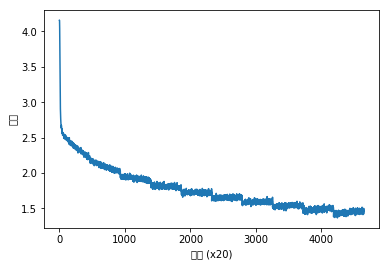

AttributeError: 'numpy.ndarray' object has no attribute 'astpye'

In [19]:
import sys 
sys.path.append("..")
from common import config



import pickle
from common.trainer import Trainer
from common.optimizer import Adam
from cbow import CBOW
from common.util import create_contexts_target, to_cpu, to_gpu
from dataset2 import ptb

window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10


corpus, word_to_id, id_to_word = ptb.load_data("train")
vocab_size = len(word_to_id)

contexts, target = create_contexts_target(corpus, window_size)

    
model = CBOW(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()


word_vecs = model.word_vecs

params ={}
params["word_vecs"] = word_vecs.astype(np.float16)
params["word_to_id"] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = "cbow_params.pkl"
with open(pkl_file, "wb") as f:
    pickle.dump(params, f, -1)



In [20]:
import sys 
sys.path.append("..")
from common.util import most_similar
import pickle

pkl_file = "cbow_params.pkl"

with open(pkl_file, "rb") as f:
    params = pickle.load(f)
    word_vecs = params["word_vecs"]
    word_to_id = params["word_to_id"]
    id_to_word = params["id_to_word"]
    
querys = [" you", "year","car", "toyota"]
for query in querys :
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

 you(을)를 찾을 수 없습니다.

[query] year
 month: 0.71875
 week: 0.65234375
 spring: 0.62744140625
 summer: 0.6259765625
 decade: 0.603515625

[query] car
 luxury: 0.497314453125
 arabia: 0.47802734375
 auto: 0.47119140625
 disk-drive: 0.450927734375
 travel: 0.4091796875

[query] toyota
 ford: 0.55078125
 instrumentation: 0.509765625
 mazda: 0.49365234375
 bethlehem: 0.47509765625
 nissan: 0.474853515625
